## Objective: Do trend analysis of topics over time

- split the data by week
- create frequency table of topics by year, week

In [1]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(), "utils"))
from loadutils import load_csv

In [2]:
df = load_csv('220k.csv')

In [3]:
len(df)

219594

In [7]:
df['year'] = df['created_at'].dt.isocalendar().year
df['week'] = df['created_at'].dt.isocalendar().week
df['month'] = df['created_at'].dt.month

### Posts by month_yr

In [8]:
df_posts = df.groupby(['year', 'month']).size()

<AxesSubplot:title={'center':'Number of products created per month'}, xlabel='year,month'>

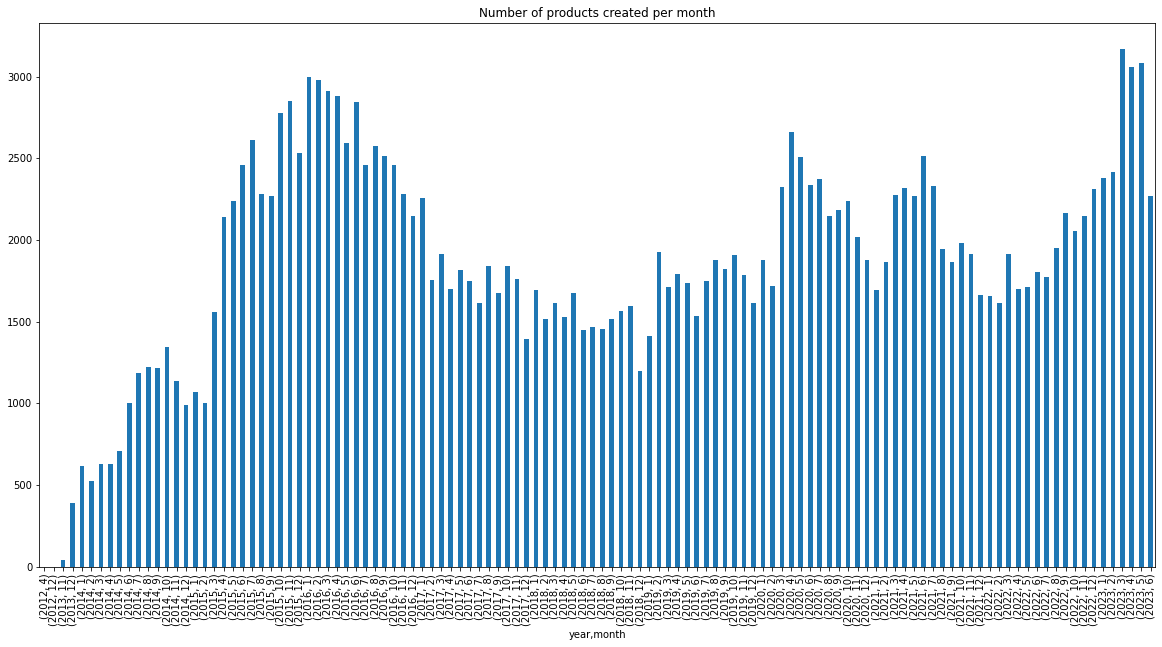

In [9]:
df_posts.plot(kind='bar', figsize=(20, 10), title='Number of products created per month')

### Posts by topic and month_yr

In [10]:
df_t = df.explode('topic_list')

In [11]:
df_exp = df_t.groupby(['year', 'month', 'topic_list']).size().reset_index(name='count').sort_values(['year', 'month', 'count'], ascending=[False, False, False])

In [21]:
df_exp.to_csv('df_topic_trends.csv', index=False)